In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
data=pd.read_csv("winequality-red.csv")

    The source of the data is UC Irvine Machine Learning. So, this dataset is from a university that provides reliable data for students to practice with machine learning techniques. In this data, there are 11 columns of measured indicators that influence overall quality, which is the 12th column. The quality is a continuous varible in the range of [3-8].
    I chose this dataset because I am interested in what indicators have an influence over the quality of the wine. You always hear about wine critics and how that profession sometimes is not the best, to put it lightly. However, is there some science to the idea that someone can taste wine and understand its quality. Furthermore, can a computer be trained to predict the wine quality, so you can efficiently make the best wine possible. 

# Explore the Data

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


Since the range of quality is [3,8], the cut off for 'good' wine will be 6.5

In [6]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


It appears that a linear regression exists with quality and volatile acidity, citric acid, chlorides, sulphates. These will be important in how the algorithms consider quality.

# Transform the Quality Column and Visualize the Data

In [7]:
data['QualityB']=data['quality'] >= 6.5
data['QualityB']=data['QualityB'].astype(int)
dataset=data.drop('quality',axis=1)
dataset.groupby('QualityB').count()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
QualityB,,,,,,,,,,,
0,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382
1,217,217,217,217,217,217,217,217,217,217,217


<AxesSubplot:>

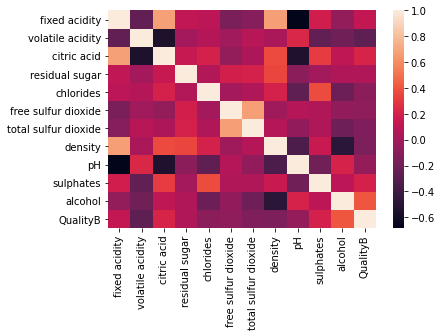

In [8]:
sns.heatmap(dataset.corr())

In [9]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityB
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


From the heatmap and correlation, when comparing quality,alcohol is strongest correlation, along with  volatile acid,citric acid and sulphates being close behind.

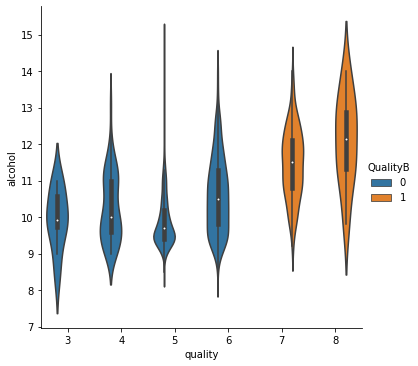

In [10]:
sns.catplot(x="quality",y="alcohol",hue="QualityB",data=data,kind="violin")

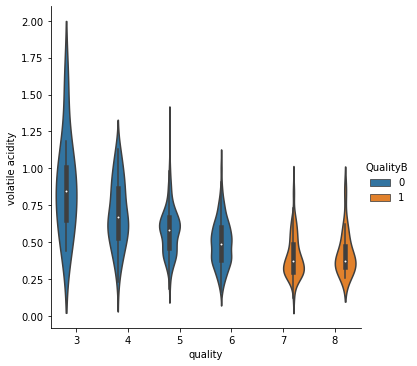

In [11]:
sns.catplot(x="quality",y="volatile acidity",hue="QualityB",data=data,kind="violin")

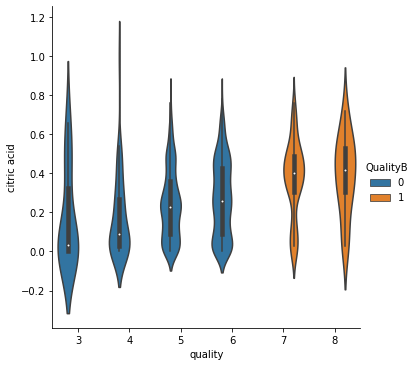

In [12]:
sns.catplot(x="quality",y="citric acid",hue="QualityB",data=data,kind="violin")

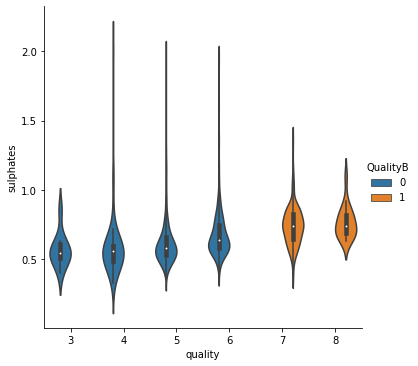

In [13]:
sns.catplot(x="quality",y="sulphates",hue="QualityB",data=data,kind="violin")

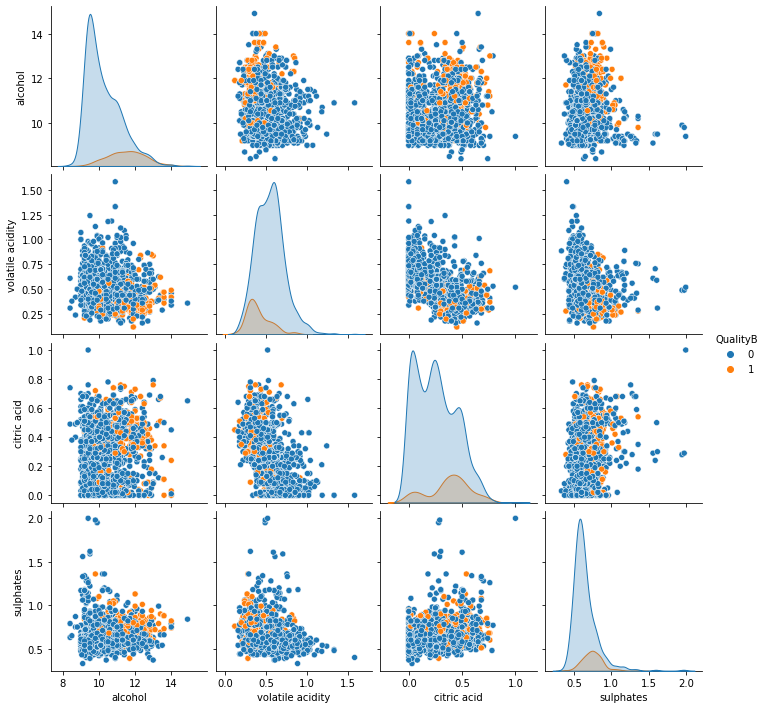

In [14]:
sns.pairplot(data.drop("quality",axis=1),hue="QualityB",vars=["alcohol","volatile acidity","citric acid","sulphates"])

The four columns visualized above deliver an insight to where the quality is good (QualityB = 1) or bad (QualityB = 0). These have the strongest correlation, so they help understand what factors into making a quality wine.

# Split the dataset into train and test sets

In [15]:
X=dataset.iloc[:,0:-1]
y=dataset.QualityB
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: QualityB, dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

# Logsitic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LogReg = LogisticRegression()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
print("Accuracy:",LogReg.score(X_test,y_test))

Accuracy: 0.88


# Decision Tree Classification:

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [22]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8825

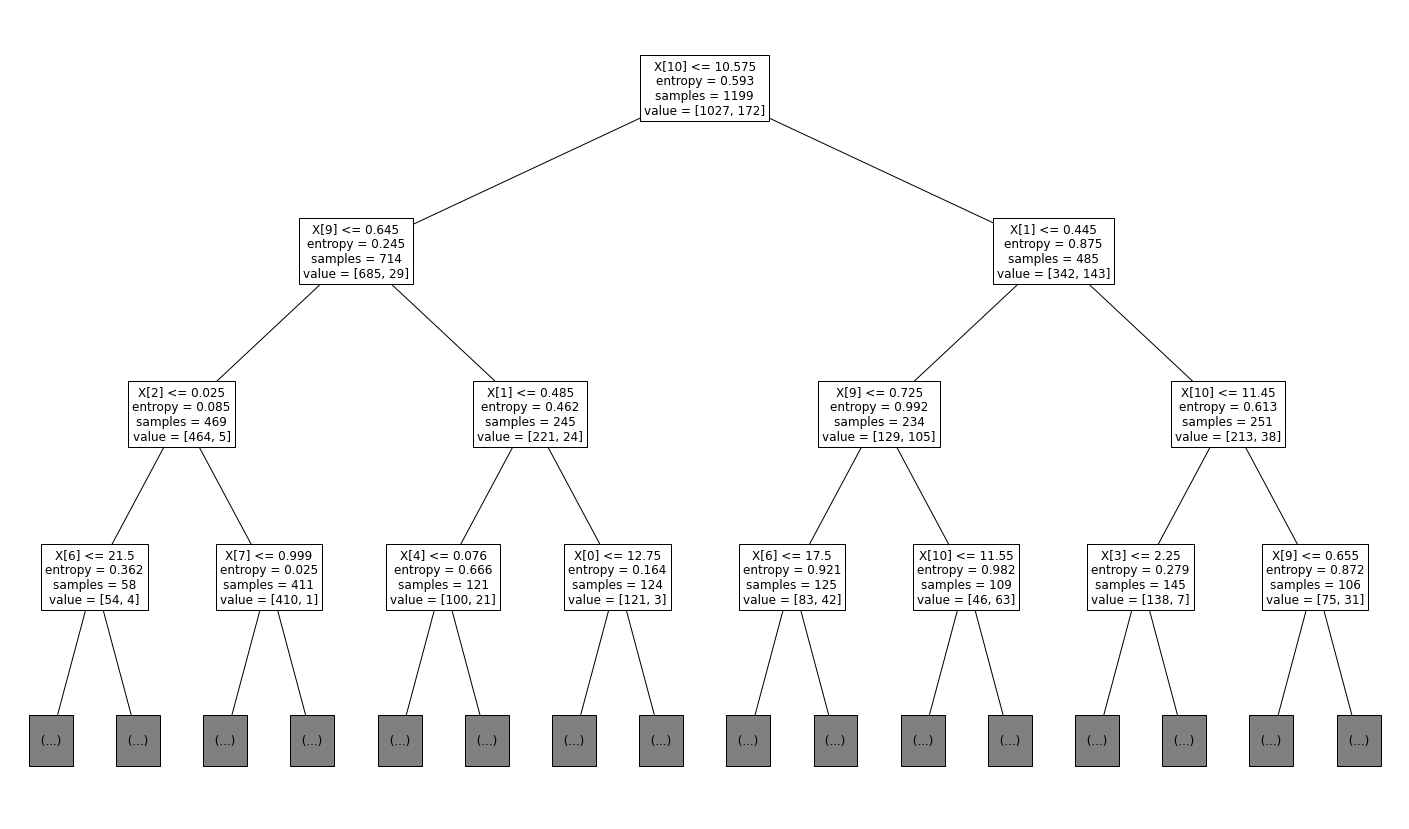

In [23]:
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

# Random Forest Classifier:

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,
                            random_state=99)
rf_cl.fit(X_train, y_train)
rf_pred= rf_cl.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.912500


# XGBoost Classification:

In [26]:
import xgboost as xgb

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [28]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic',verbosity = 0,use_label_encoder=False, max_depth=10, n_estimators=100, seed=99) 
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test) 
print("accuracy: %f" % (float(np.sum(preds==y_test))/y_test.shape[0]))

accuracy: 0.907500


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

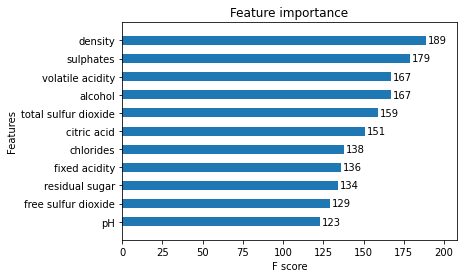

In [29]:
xgb.plot_importance(xg_cl,importance_type='weight',grid=False,height=.5)

# Neural Network with Keras:

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import BatchNormalization

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [32]:
model=Sequential()
model.add(Dense(8,input_shape=(11,),activation='softmax'))
model.add(Dense(4,activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(2,activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(1,activation='softmax'))
model.compile(optimizer='sgd',loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=5,validation_split=0.2)
preds=model.predict(X_test)
model.evaluate(X_test,y_test)

Epoch 1/5
30/30 [==============================] - 2s 31ms/step - loss: 0.7335 - val_loss: 0.7310
Epoch 2/5
30/30 [==============================] - 0s 4ms/step - loss: 0.6141 - val_loss: 0.6471
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5845
Epoch 4/5
30/30 [==============================] - 0s 4ms/step - loss: 0.5326 - val_loss: 0.5378
Epoch 5/5
13/13 [==============================] - 0s 1ms/step - loss: 0.4855


0.48554858565330505

# Neural Network with Pytorch:

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [35]:
class nnData(Dataset):
    def __init__(self):
        xy=dataset.to_numpy(dtype=np.float32)
        self.x=torch.from_numpy(xy[:,:-1])
        self.y=torch.from_numpy(xy[:,[-1]])
        self.n_samples=xy.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [36]:
class Net(nn.Module):
    def __init__(self,n_inputs, hidden_size):
        super(Net,self).__init__()
        self.inputs= n_inputs
        self.hidden= hidden_size
        
        self.fc1=nn.Linear(self.inputs,self.hidden)
        self.fc2=nn.Linear(self.hidden,1)
    
    def forward(self,x):
        out=self.fc1(x)
        out=F.relu(out)
        out=self.fc2(out)
        return out

In [37]:
nn_Data=nnData()
trainloader=DataLoader(dataset=nn_Data,batch_size=32,num_workers=1)
testloader=DataLoader(dataset=nn_Data,num_workers=1)

In [38]:
net=Net(n_inputs=11,hidden_size=10)
criterion= nn.CrossEntropyLoss()
optimizer= optim.Adam(params=net.parameters(),lr=3e-4)
for epoch in range(1):
    for inputs,labels in trainloader:
        outputs=net.forward(inputs)
        labels = np.argmax(labels,axis=1)
        loss=criterion(outputs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [39]:
correct, total=0,0
predictions=[]
net.eval()
for inputs,labels in testloader:
    outputs=net(inputs)
    _, predicted= torch.max(outputs.data,1)
    predictions.append(outputs)
    total +=labels.size(0)
    correct +=(predicted==labels).sum().item()

In [40]:
print(correct/total)

0.8642901813633521


# Comparison and Discussion 

Through all these techniques, the most accurate model is Random Forrest Cluster at 0.9125. This makes sense, as it uses many decision trees and 'votes'. Since the Decision Tree model was the third most accurate at .8825, using many of them and finding the mode of what they find should show promising results. However, it was somewhat suprising the XGBoost was not the most accurate at 0.907. It was my belief that it would be, based on less knowledge of the topic and my belief that a tree would not be the strongest predictor to use for the features. Then, the logistic regression model was the fourth most accurate at 0.88. The fifth most acurate model was the Pytorch Neural Network at 0.864. Then finally the Keras Neural Network model at 0.466. I am not suprised that the neural networks were the weakest models. I found that the choice of the optimizers and activation functions made the overall models weak since I was not sure exactly of them to use. Possibly neural networks could be the strongest models, as 0.9125 is not the most accurate, however using different functions and a better understanding in how to utilze them would be needed. 

Furthermore, something I would like to pose as a question, maybe I can get the answer in my feedback for this project, I am confused as to why my Keras Neural Network gives me a different accuracy score every time. All the other models return the same scores, so my intuitioin that it was how the data is split doesn't hold. It is probably easily explained, I am just curious as to why and how can it become consitent. 